## Plotting

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (9, 6)

sys.path.insert(0, "..")
from omegaconf import OmegaConf
from floral.utils.plotting import (
    MODES, METRICS, INDICES,
    load_runs,
    histories_to_df,
)

SEED = 0
OUTPUT_DIR = "../outputs"

# --- Choose Task --- #
# task = "synthetic_linear_simple"
# task = "synthetic_linear"
# task = "synthetic_mlp_simple"
# task = "synthetic_mlp"
task = "synthetic_mlp_bn"
# task = "mnist_rotate"
# task = "mnist_label_shift"
# task = "cifar10_rotate"
# task = "cifar10_label_shift"
# task = "cifar100"
# task = "emnist"
# task = "shakespeare"
# task = "stackoverflow"


In [7]:
filter_values = f"""
experiment: [test_{task}]
seed: [{SEED}]
"""

ignore_values = """
"""

In [8]:
histories = load_runs(output_dir=OUTPUT_DIR)
history_df = histories_to_df(histories,
                             filter_values=OmegaConf.create(filter_values),
                             ignore_values=OmegaConf.create(ignore_values),
                             downsampled_len=100,
                             hide_na=False)
display(history_df)

,round,loss_distributed,loss_distributed_fit,router_entropy_distributed_fit,time_distributed,time_distributed_fit,loss_centralized,identifier,task,method,...,normlora,convlora_method,normlora_reparam,acc_distributed,loss_in_vocab_distributed,accuracy_distributed,accuracy_top1_distributed,accuracy_top3_distributed,accuracy_top5_distributed,accuracy_top10_distributed
0,30,0.283488,0.256538,1.353026,0.131762,2.621175,NaN,sweep,synthetic_mlp_bn,floral_normlora,...,True,out,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,0.268592,0.226564,1.343386,0.431705,8.143159,NaN,sweep,synthetic_mlp_bn,floral_normlora,...,True,out,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,0.252724,0.216393,1.324940,0.788120,13.854120,NaN,sweep,synthetic_mlp_bn,floral_normlora,...,True,out,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120,0.213408,0.209736,1.289940,1.053708,19.403565,NaN,sweep,synthetic_mlp_bn,floral_normlora,...,True,out,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150,0.154369,0.201463,1.231863,1.333393,24.971462,NaN,sweep,synthetic_mlp_bn,floral_normlora,...,True,out,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,1454,1.697700,1.675242,NaN,405.364708,4599.128611,NaN,sweep,shakespeare,fedavg,...,NaN,NaN,NaN,NaN,2.138798,39.393360,39.393360,NaN,72.411176,NaN
2724,1469,1.666379,1.672761,NaN,409.202536,4655.375447,NaN,sweep,shakespeare,fedavg,...,NaN,NaN,NaN,NaN,2.141636,39.664471,39.664471,NaN,72.506283,NaN
2725,1484,1.682735,1.662760,NaN,413.239103,4707.050591,NaN,sweep,shakespeare,fedavg,...,NaN,NaN,NaN,NaN,2.125292,40.088542,40.088542,NaN,73.108276,NaN
2726,1499,1.669700,1.660126,NaN,417.292431,4754.438995,NaN,sweep,shakespeare,fedavg,...,NaN,NaN,NaN,NaN,2.130618,39.983630,39.983630,NaN,72.937834,NaN


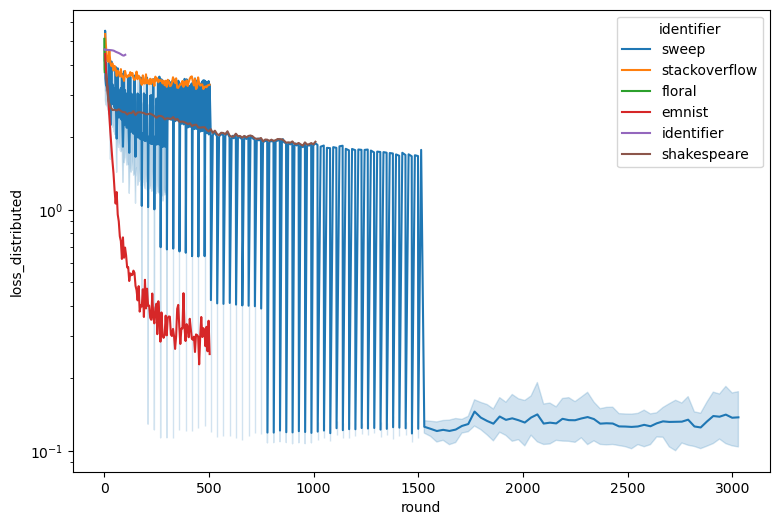

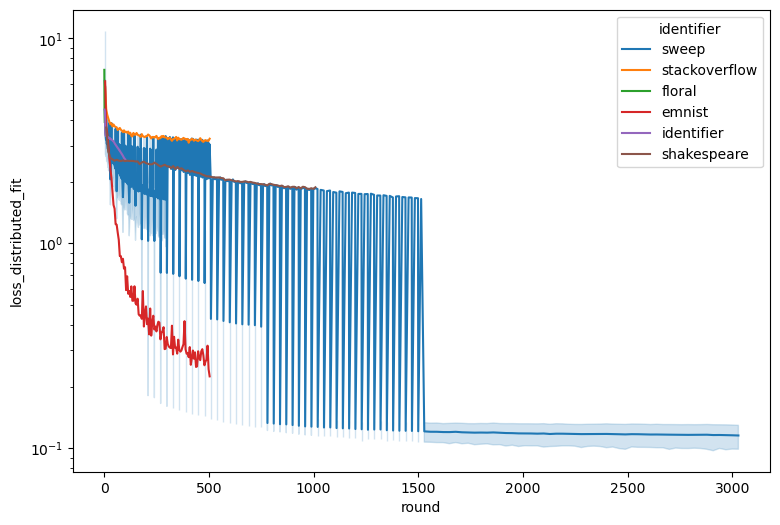

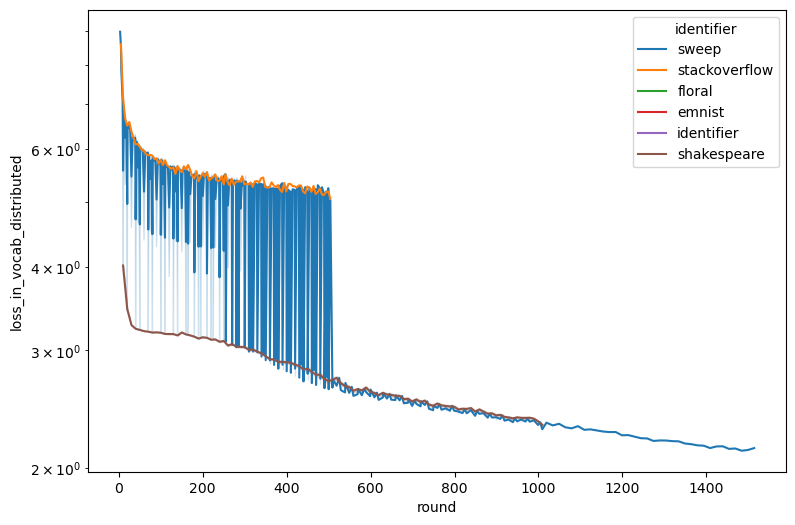

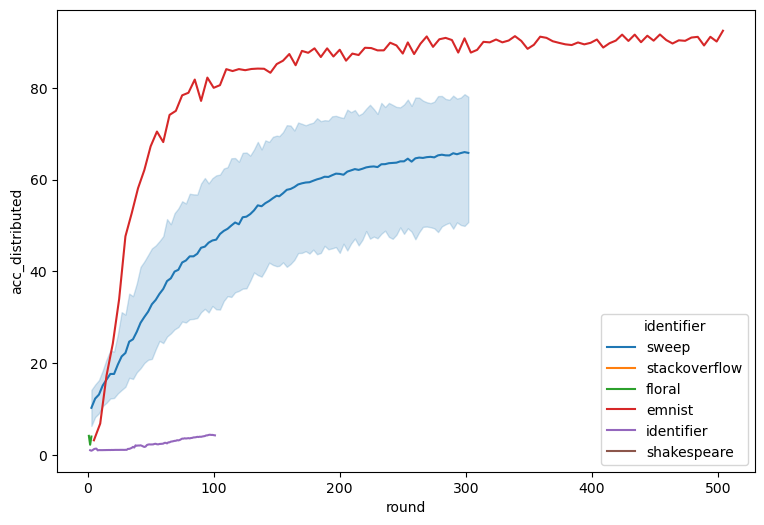

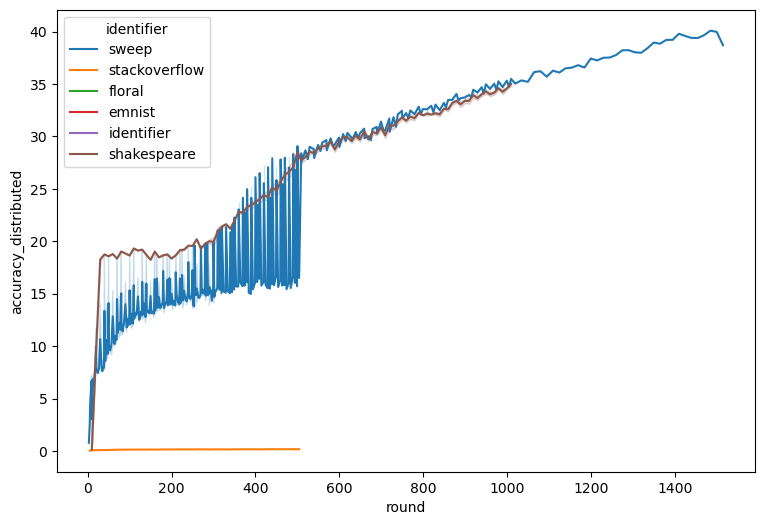

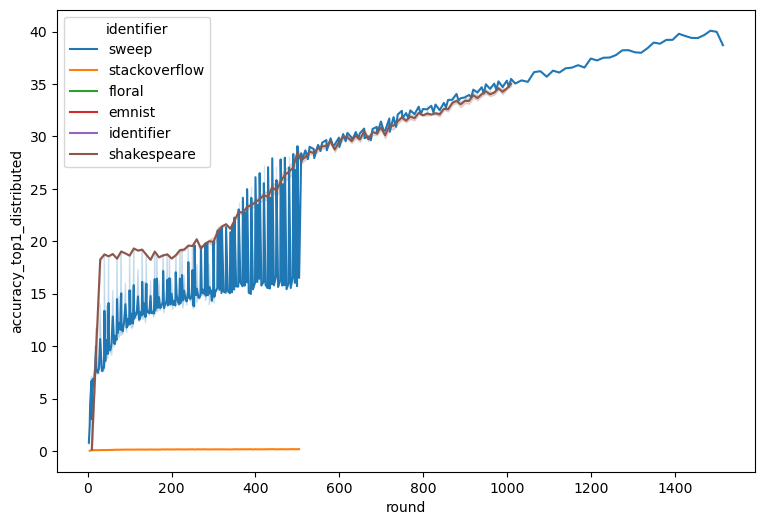

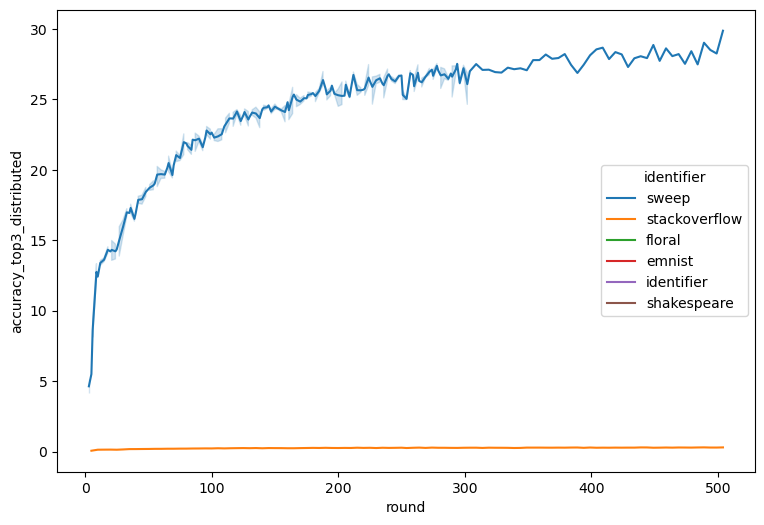

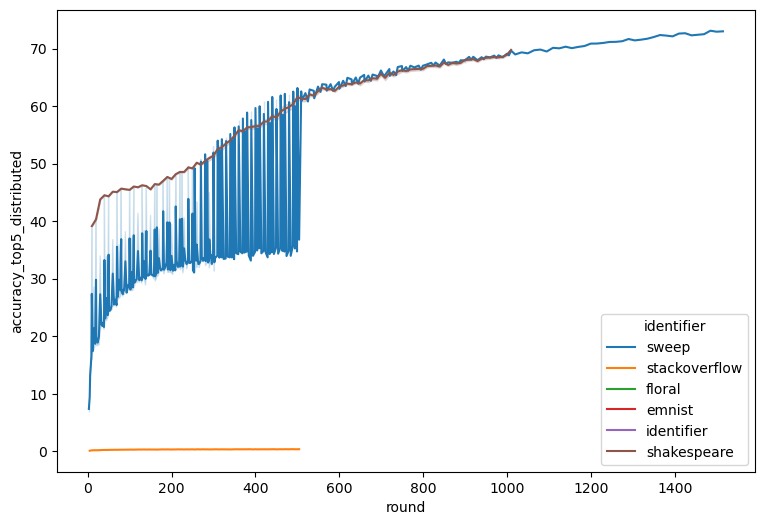

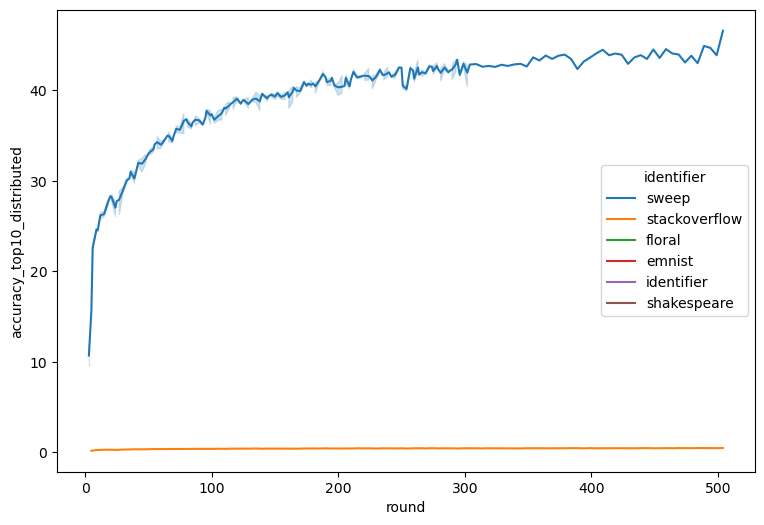

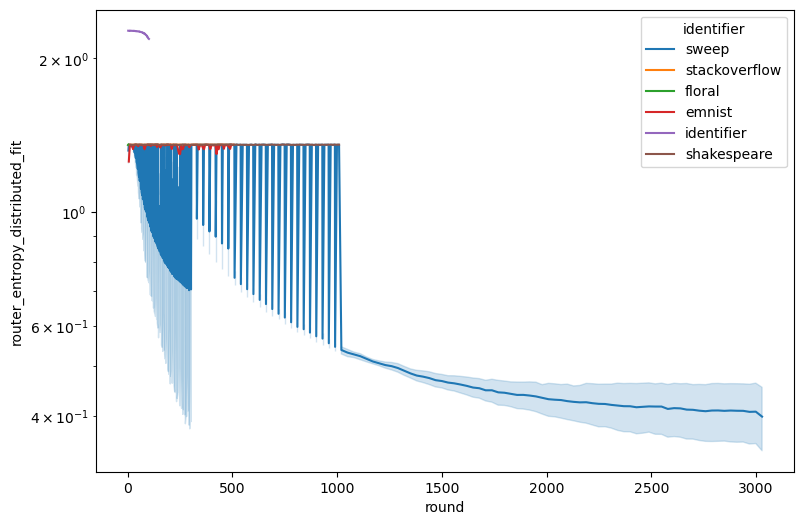

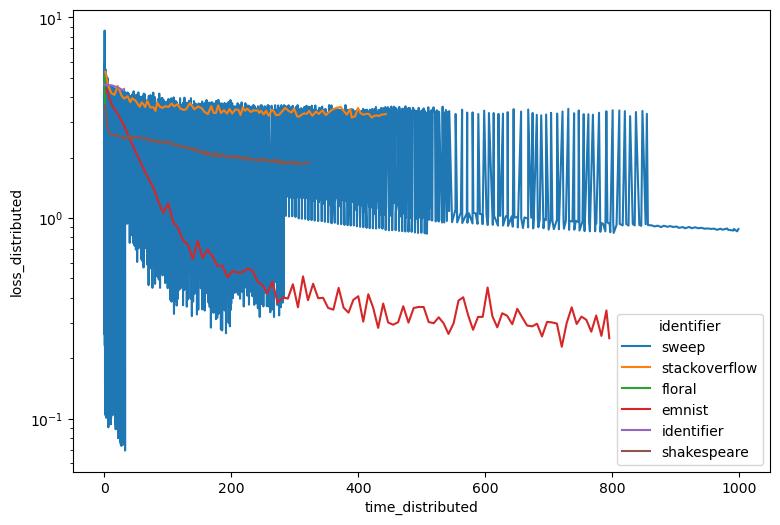

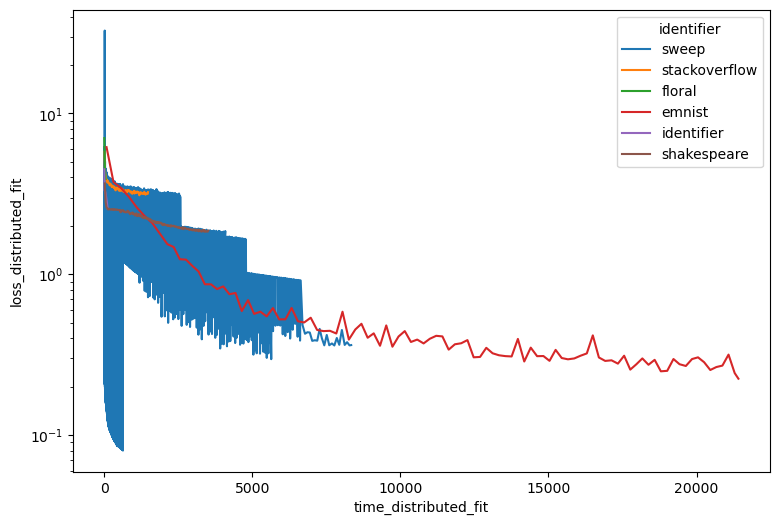

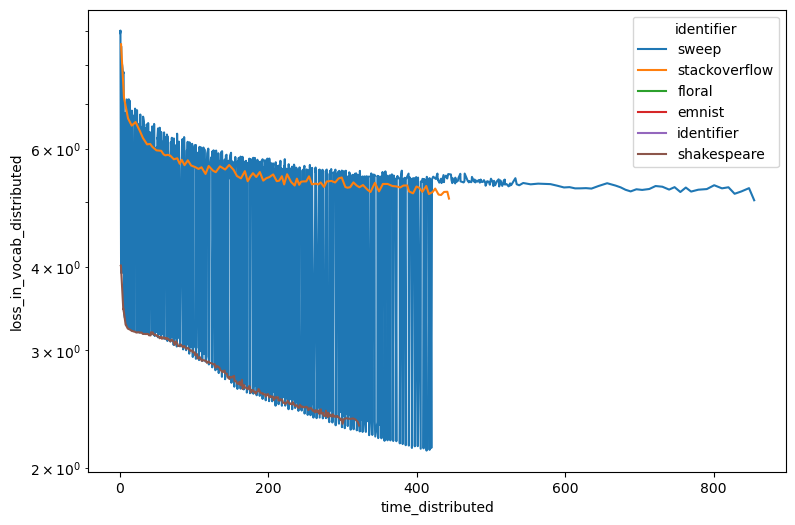

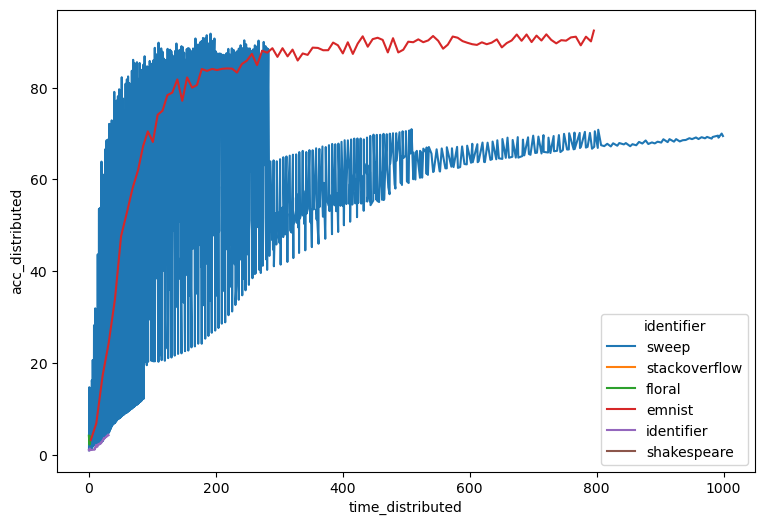

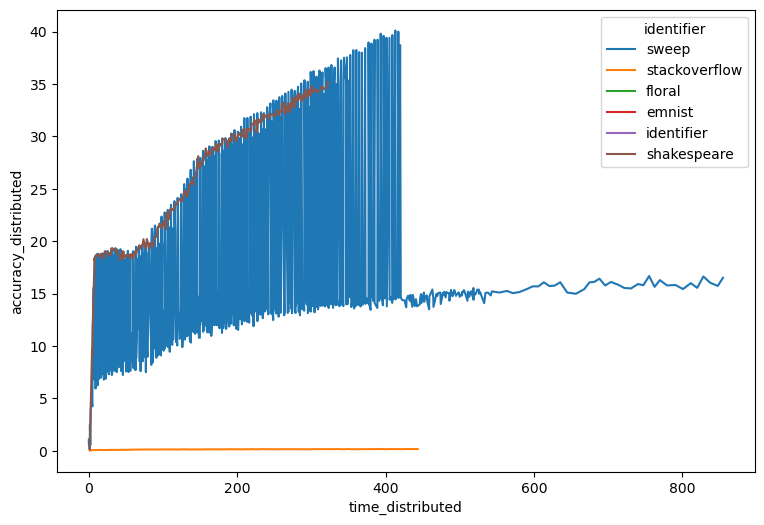

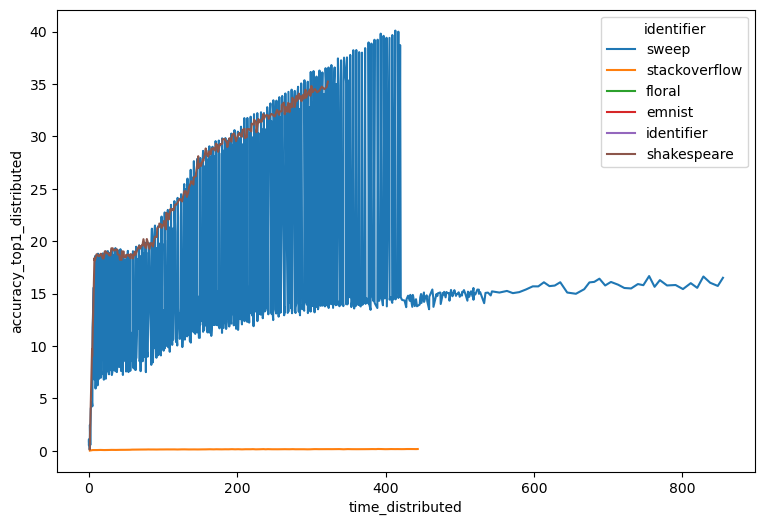

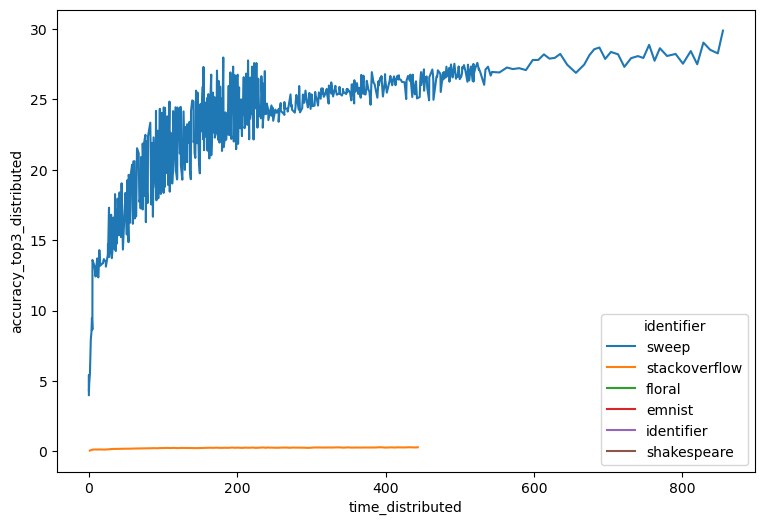

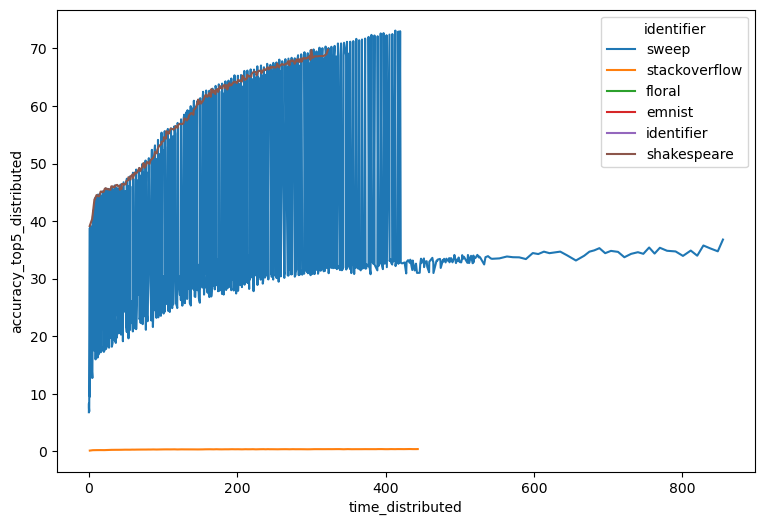

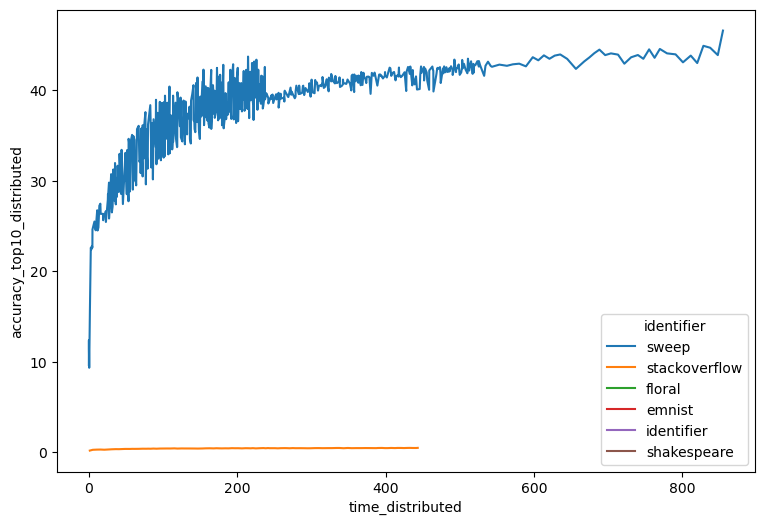

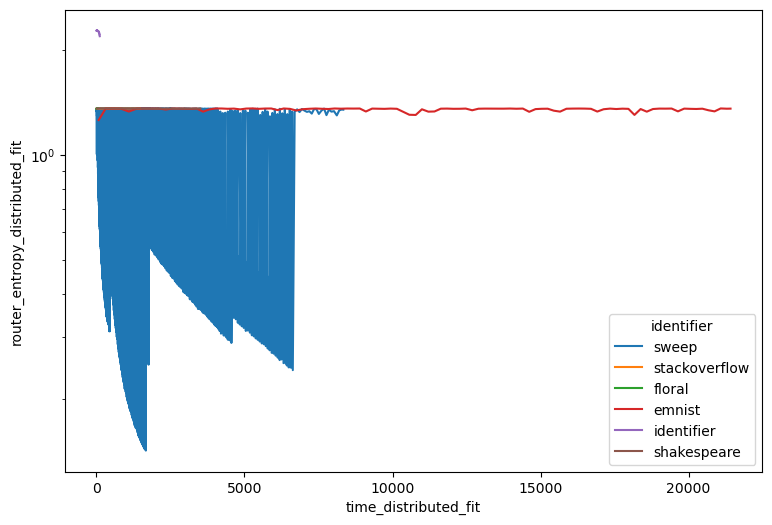

In [9]:
for index in INDICES:
    for metric in METRICS:
        for mode in MODES:
            x = index if index == "round" else f"{index}_{mode}"
            y = f"{metric}_{mode}"
            if x not in history_df.columns or y not in history_df.columns:
                continue
            history_df = history_df.dropna(subset=x)
            if len(history_df) == 0 or history_df[y].sum() == 0.0:
                continue
            fig, ax = plt.subplots(1)
            sns.lineplot(x=x, y=y, hue="identifier", data=history_df, ax=ax)
            # sns.lineplot(x=x, y=y, data=history_df, ax=ax, hue="lr", size="reg")
            if 'acc' not in metric:
                ax.set_yscale('log')

In [10]:
metric = "loss_distributed"
last_round_df = history_df[history_df["round"] == history_df["round"].max()]
last_round_df[last_round_df[metric] == last_round_df[metric].min()]

,round,loss_distributed,loss_distributed_fit,router_entropy_distributed_fit,time_distributed,time_distributed_fit,loss_centralized,identifier,task,method,...,normlora,convlora_method,normlora_reparam,acc_distributed,loss_in_vocab_distributed,accuracy_distributed,accuracy_top1_distributed,accuracy_top3_distributed,accuracy_top5_distributed,accuracy_top10_distributed
504,3029,0.069355,0.080076,0.486746,32.709975,628.077744,NaN,sweep,synthetic_mlp_bn,floral_normlora_reparam,...,True,out,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
